# <b>SC1015 Mini-Project: Predicting Natural Disasters from Increasing Temperatures</b>
### Group 6 Members: Foo Jen Sean, Jeffrey Lim Yi Ren, Karishein Chandran

---

# Multivariate Linear Regression to Predict Frequency of Natural Disasters using CO2, CH4, N2O and Temperature Change (Model 1)

## Cleaning and Preparing CO2 Dataset
Finding the average Atmospheric CO2 level per year (from 2001):

In [ ]:
# co2Data_model.iloc[(co2Data_model.index >= "2001") & (co2Data_model.index < "2022")]

avg_co2 = {}
for year in range (2001, 2021):
  avg_co2[year] = co2Data_model.iloc[(co2Data_model.index >= str(year)) & (co2Data_model.index < str(year+1))].mean()

co2Data_LF = pd.DataFrame.from_dict(avg_co2, orient="index").rename(columns={"average" : "CO2 Average"})
co2Data_LF

,CO2 Average
2001,371.319167
2002,373.452500
2003,375.983333
2004,377.698333
2005,379.983333
2006,382.090833
2007,384.025000
2008,385.830833
2009,387.643333
2010,390.101667


## Cleaning and Preparing CH4 Dataset
Finding the average Atmospheric CH4 level per year (from 2001):

In [ ]:
# ch4Data_model.iloc[(ch4Data_model.index >= "2001") & (ch4Data_model.index < "2022")]

avg_ch4 = {}
for year in range (2001, 2021):
  avg_ch4[year] = ch4Data_model.iloc[(ch4Data_model.index >= str(year)) & (ch4Data_model.index < str(year+1))].mean()

ch4Data_LF = pd.DataFrame.from_dict(avg_ch4, orient="index").rename(columns={"average" : "CH4 Average"})
ch4Data_LF

,CH4 Average
2001,1771.275000
2002,1772.741667
2003,1777.400000
2004,1777.008333
2005,1774.191667
2006,1775.033333
2007,1781.525000
2008,1787.091667
2009,1793.600000
2010,1799.008333


## Cleaning and Preparing N2O Dataset
Finding the average Atmospheric N2O level per year (from 2001):

In [ ]:
# n2oData_model.iloc[(n2oData_model.index >= "2001") & (n2oData_model.index < "2022")]

avg_n2o = {}
for year in range (2001, 2021):
  avg_n2o[year] = n2oData_model.iloc[(n2oData_model.index >= str(year)) & (n2oData_model.index < str(year+1))].mean()

n2oData_LF = pd.DataFrame.from_dict(avg_n2o, orient="index").rename(columns={"average" : "N2O Average"})
n2oData_LF

,N2O Average
2001,316.366667
2002,316.933333
2003,317.625000
2004,318.258333
2005,318.933333
2006,319.833333
2007,320.466667
2008,321.516667
2009,322.266667
2010,323.191667


## Cleaning and Preparing Temperature Change Dataset
Finding the average temperature change per year (from 2001):

In [ ]:
# tempData.iloc[(tempData.index >= "2001") & (tempData.index < "2022")].drop(columns=['Entity', 'Code'])

avg_temp = {}
for year in range (2001, 2021):
  avg_temp[year] = tempData.iloc[(tempData.index >= str(year)) & (tempData.index < str(year+1))].mean()

tempData_LF = pd.DataFrame.from_dict(avg_temp, orient="index")
tempData_LF

,temperature_anomaly
2001,0.535000
2002,0.627500
2003,0.615833
2004,0.533333
2005,0.675833
2006,0.635000
2007,0.661667
2008,0.540000
2009,0.653333
2010,0.718333


## Concatenating all datasets into a single dataframe
Concatenating all datasets (CO2, CH4, N2O, Temperature Change) with Number of Disasters per year into a single dataframe:

In [ ]:
total_LF = pd.concat([co2Data_LF, ch4Data_LF, n2oData_LF, tempData_LF, disasterCountPerYear[disasterCountPerYear.index >= 2001]], axis=1)
total_LF

,CO2 Average,CH4 Average,N2O Average,temperature_anomaly,No. Of Disasters
2001,371.319167,1771.275000,316.366667,0.535000,447
2002,373.452500,1772.741667,316.933333,0.627500,532
2003,375.983333,1777.400000,317.625000,0.615833,392
2004,377.698333,1777.008333,318.258333,0.533333,405
2005,379.983333,1774.191667,318.933333,0.675833,498
2006,382.090833,1775.033333,319.833333,0.635000,446
2007,384.025000,1781.525000,320.466667,0.661667,449
2008,385.830833,1787.091667,321.516667,0.540000,400
2009,387.643333,1793.600000,322.266667,0.653333,384
2010,390.101667,1799.008333,323.191667,0.718333,441


## Multivariate Linear Regression Model 1
Predictors: CO2, CH4, N2O, Temperature Change

Intercept of Regression 	: b =  [10437.5069256]
Coefficients of Regression 	: a =  [[ 13.74116029   2.09891053 -59.77098995 222.65284653]]

            Predictors  Coefficients
0          CO2 Average     13.741160
1          CH4 Average      2.098911
2          N2O Average    -59.770990
3  temperature_anomaly    222.652847



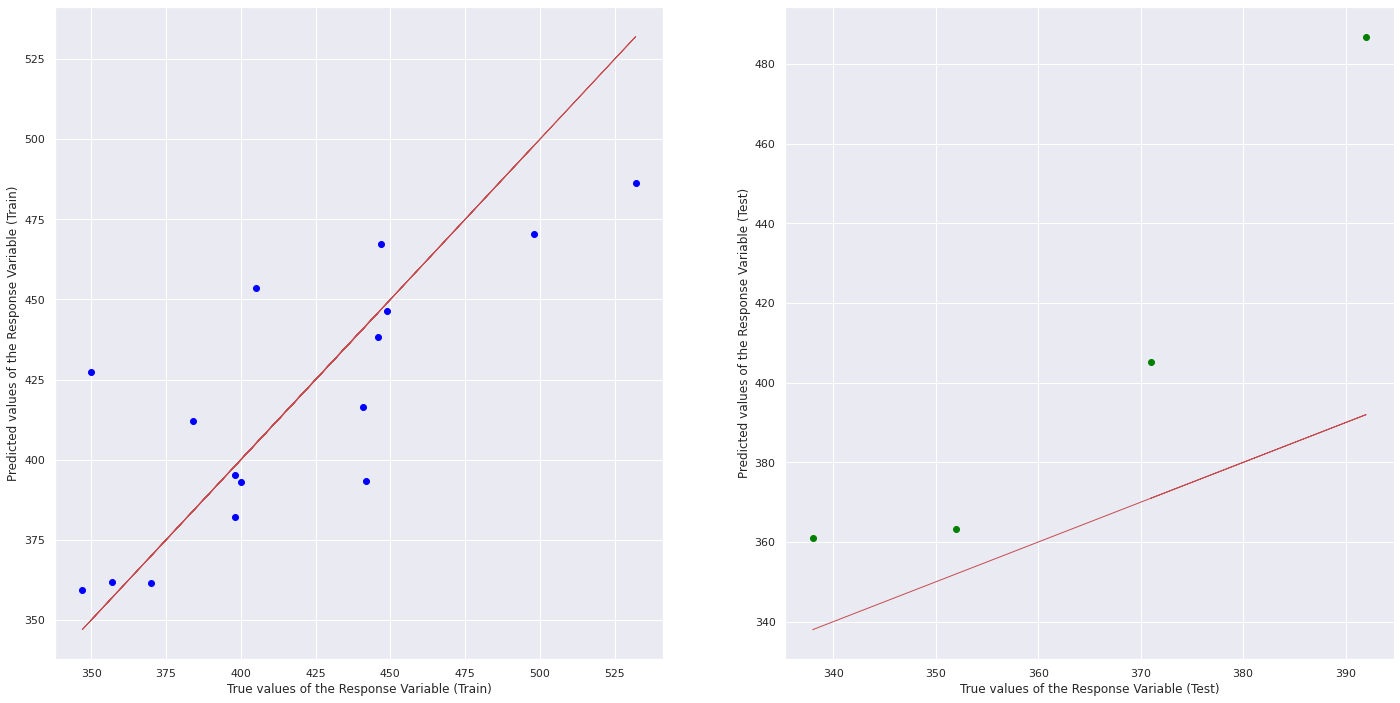

Goodness of Fit of Model 		Train Dataset
Explained Variance (R^2) 		: 0.6118267149600654
Mean Squared Error (MSE) 		: 999.3036006746815
Root Mean Squared Error (RMSE) 	: 31.61176364385071

Goodness of Fit of Model 		Test Dataset
Explained Variance (R^2) 		: -5.559433554388047
Mean Squared Error (MSE) 		: 2706.996234976517
Root Mean Squared Error (RMSE) 	: 52.028801975218656



In [ ]:
from sklearn.model_selection import train_test_split
predictors = ["CO2 Average", "CH4 Average", "N2O Average", "temperature_anomaly"]

y = pd.DataFrame(total_LF["No. Of Disasters"])
x = pd.DataFrame(total_LF[predictors])

# split in to train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression() # create the linear regression object
linreg.fit(x_train, y_train) # train the linear regression model
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \t\tTrain Dataset")
print("Explained Variance (R^2) \t\t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t\t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \t\tTest Dataset")
print("Explained Variance (R^2) \t\t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t\t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Creating a seperate dataframe for CO2 predicted data (2021 - 2030):

In [ ]:
co2Data_pred = forecast_co2.to_frame().iloc[forecast_co2.index >= "2021"]

avg_co2_pred = {}
for year in range (2021, 2031):
  avg_co2_pred[year] = co2Data_pred.iloc[(co2Data_pred.index >= str(year)) & (co2Data_pred.index < str(year+1))].mean()

co2Data_PredAvg = pd.DataFrame.from_dict(avg_co2_pred, orient="index").rename(columns={"predicted_mean" : "CO2 Average"})
co2Data_PredAvg

,CO2 Average
2021,415.783164
2022,418.047540
2023,420.311916
2024,422.576292
2025,424.840668
2026,427.105044
2027,429.369421
2028,431.633797
2029,433.898173
2030,436.162549


Creating a seperate dataframe for CH4 predicted data (2021 - 2030):

In [ ]:
# forecast_ch4

ch4Data_pred = forecast_ch4.to_frame().iloc[forecast_ch4.index >= "2021"]

avg_ch4_pred = {}
for year in range (2021, 2031):
  avg_ch4_pred[year] = ch4Data_pred.iloc[(ch4Data_pred.index >= str(year)) & (ch4Data_pred.index < str(year+1))].mean()

ch4Data_PredAvg = pd.DataFrame.from_dict(avg_ch4_pred, orient="index").rename(columns={"predicted_mean" : "CH4 Average"})
ch4Data_PredAvg

,CH4 Average
2021,1878.427730
2022,1885.242155
2023,1892.056580
2024,1898.871005
2025,1905.685430
2026,1912.499855
2027,1919.314280
2028,1926.128705
2029,1932.943130
2030,1939.757555


Creating a seperate dataframe for N2O predicted data (2021 - 2030):

In [ ]:
# forecast_n2o

n2oData_pred = forecast_n2o.to_frame().iloc[forecast_n2o.index >= "2021"]

avg_n2o_pred = {}
for year in range (2021, 2031):
  avg_n2o_pred[year] = n2oData_pred.iloc[(n2oData_pred.index >= str(year)) & (n2oData_pred.index < str(year+1))].mean()

n2oData_PredAvg = pd.DataFrame.from_dict(avg_n2o_pred, orient="index").rename(columns={"predicted_mean" : "N2O Average"})
n2oData_PredAvg

,N2O Average
2021,332.982800
2022,333.807801
2023,334.632801
2024,335.457801
2025,336.282802
2026,337.107802
2027,337.932802
2028,338.757803
2029,339.582803
2030,340.407803


Creating a seperate dataframe for Temperature Change predicted data (2021 - 2030):

In [ ]:
forecast_temp

tempData_pred = forecast_temp.to_frame().iloc[forecast_temp.index >= "2021"]

avg_temp_pred = {}
for year in range (2021, 2031):
  avg_temp_pred[year] = tempData_pred.iloc[(tempData_pred.index >= str(year)) & (tempData_pred.index < str(year+1))].mean()

tempData_PredAvg = pd.DataFrame.from_dict(avg_temp_pred, orient="index").rename(columns={"predicted_mean" : "temperature_anomaly"})
tempData_PredAvg

,temperature_anomaly
2021,0.920804
2022,0.941394
2023,0.956269
2024,0.975124
2025,0.991229
2026,1.009238
2027,1.025930
2028,1.043533
2029,1.060506
2030,1.077915


Combining all predicted values (CO2, CH4, N2O, Temperature Change) into a single dataframe:

In [ ]:
total_pred = pd.concat([co2Data_PredAvg, ch4Data_PredAvg, n2oData_PredAvg, tempData_PredAvg], axis=1)
total_pred

,CO2 Average,CH4 Average,N2O Average,temperature_anomaly
2021,415.783164,1878.427730,332.982800,0.920804
2022,418.047540,1885.242155,333.807801,0.941394
2023,420.311916,1892.056580,334.632801,0.956269
2024,422.576292,1898.871005,335.457801,0.975124
2025,424.840668,1905.685430,336.282802,0.991229
2026,427.105044,1912.499855,337.107802,1.009238
2027,429.369421,1919.314280,337.932802,1.025930
2028,431.633797,1926.128705,338.757803,1.043533
2029,433.898173,1932.943130,339.582803,1.060506
2030,436.162549,1939.757555,340.407803,1.077915


Using predicted values of (CO2, CH4, N2O and Temperature Change), we used the Multivariate Linear Regression model to predict the amount of Natural Disasters:

In [ ]:
x_pred = pd.DataFrame(total_pred[predictors])
y_pred = linreg.predict(x_pred)
y_pred

array([[395.80989185],
       [396.50114282],
       [395.92007991],
       [396.22514051],
       [395.91792997],
       [396.03464172],
       [395.85799518],
       [395.88438306],
       [395.77025493],
       [395.75337596]])

In [ ]:
total_pred = pd.concat([total_pred, pd.DataFrame(y_pred, columns = ["Predicted Amount of Natural Disasters"], index = total_pred.index)], axis=1)
total_pred

,CO2 Average,CH4 Average,N2O Average,temperature_anomaly,Predicted Amount of Natural Disasters
2021,415.783164,1878.427730,332.982800,0.920804,395.809892
2022,418.047540,1885.242155,333.807801,0.941394,396.501143
2023,420.311916,1892.056580,334.632801,0.956269,395.920080
2024,422.576292,1898.871005,335.457801,0.975124,396.225141
2025,424.840668,1905.685430,336.282802,0.991229,395.917930
2026,427.105044,1912.499855,337.107802,1.009238,396.034642
2027,429.369421,1919.314280,337.932802,1.025930,395.857995
2028,431.633797,1926.128705,338.757803,1.043533,395.884383
2029,433.898173,1932.943130,339.582803,1.060506,395.770255
2030,436.162549,1939.757555,340.407803,1.077915,395.753376


Plotting the graph of actual Natural Disasters (1970 - 2020) with predicted Natural Disasters (2021 - 2030):

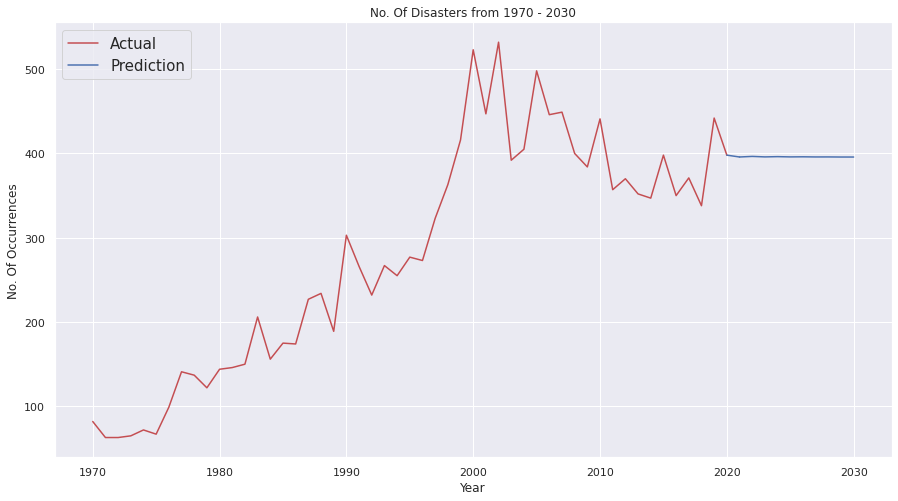

In [ ]:
# total_pred["Predicted Amount of Natural Disasters"].rename(columns={"Predicted Amount of Natural Disasters" : "No. Of Disasters"})
# pd.concat([disasterCountPerYear['No. Of Disasters'], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters")], axis=0).to_frame()
# join_line = pd.concat([disasterCountPerYear['No. Of Disasters'].iloc[-1:], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters").iloc[:1]], axis=0).to_frame()
# join_line

plt.figure(figsize=(15,8))
plt.title("No. Of Disasters from 1970 - 2030")
plt.xlabel('Year')
plt.ylabel('No. Of Occurrences')
plt.plot(disasterCountPerYear['No. Of Disasters'], 'r')
# plt.plot(pd.concat([disasterCountPerYear['No. Of Disasters'], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters")], axis=0).to_frame(), 'r')
plt.plot(total_pred["Predicted Amount of Natural Disasters"], "b")
plt.plot(pd.concat([disasterCountPerYear['No. Of Disasters'].iloc[-1:], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters").iloc[:1]], axis=0), "b")

plt.legend(["Actual", "Prediction"], loc=2, prop={"size":15})
plt.show()

# Multivariate Linear Regression to Predict Frequency of Natural Disasters using CO2 and Temperature Change Only (Model 2)

Finding the average Atmospheric CO2 level per year (from 1970):

In [ ]:
# co2Data_model
avg_co2 = {}
for year in range (1970, 2021):
  avg_co2[year] = co2Data_model.iloc[(co2Data_model.index >= str(year)) & (co2Data_model.index < str(year+1))].mean()

co2Data_LF = pd.DataFrame.from_dict(avg_co2, orient="index").rename(columns={"average" : "CO2 Average"})
co2Data_LF

,CO2 Average
1970,325.681667
1971,326.319167
1972,327.456667
1973,329.677500
1974,330.191667
1975,331.115833
1976,332.026667
1977,333.843333
1978,335.415000
1979,336.835833


Finding the average Temperature Change per year (from 1970):

In [ ]:
# tempData_model
avg_temp = {}
for year in range (1970, 2021):
  avg_temp[year] = tempData.iloc[(tempData.index >= str(year)) & (tempData.index < str(year+1))].mean()

tempData_LF = pd.DataFrame.from_dict(avg_temp, orient="index").rename(columns={"average" : "CO2 Average"})
tempData_LF

,temperature_anomaly
1970,0.025833
1971,-0.081667
1972,0.009167
1973,0.161667
1974,-0.067500
1975,-0.011667
1976,-0.095833
1977,0.178333
1978,0.068333
1979,0.165833


## Concatenating all datasets into a single dataframe
Concatenating all datasets (CO2, Temperature Change) with Number of Disasters per year into a single dataframe:

In [ ]:
total_LF = pd.concat([co2Data_LF, tempData_LF, disasterCountPerYear[disasterCountPerYear.index >= 1970]], axis=1)
total_LF

,CO2 Average,temperature_anomaly,No. Of Disasters
1970,325.681667,0.025833,82
1971,326.319167,-0.081667,63
1972,327.456667,0.009167,63
1973,329.677500,0.161667,65
1974,330.191667,-0.067500,72
1975,331.115833,-0.011667,67
1976,332.026667,-0.095833,99
1977,333.843333,0.178333,141
1978,335.415000,0.068333,137
1979,336.835833,0.165833,122


## Multivariate Linear Regression Model 2

Predictors: CO2, Temperature Change

Intercept of Regression 	: b =  [-593.00556474]
Coefficients of Regression 	: a =  [[  2.20025803 198.50764589]]

            Predictors  Coefficients
0          CO2 Average      2.200258
1  temperature_anomaly    198.507646



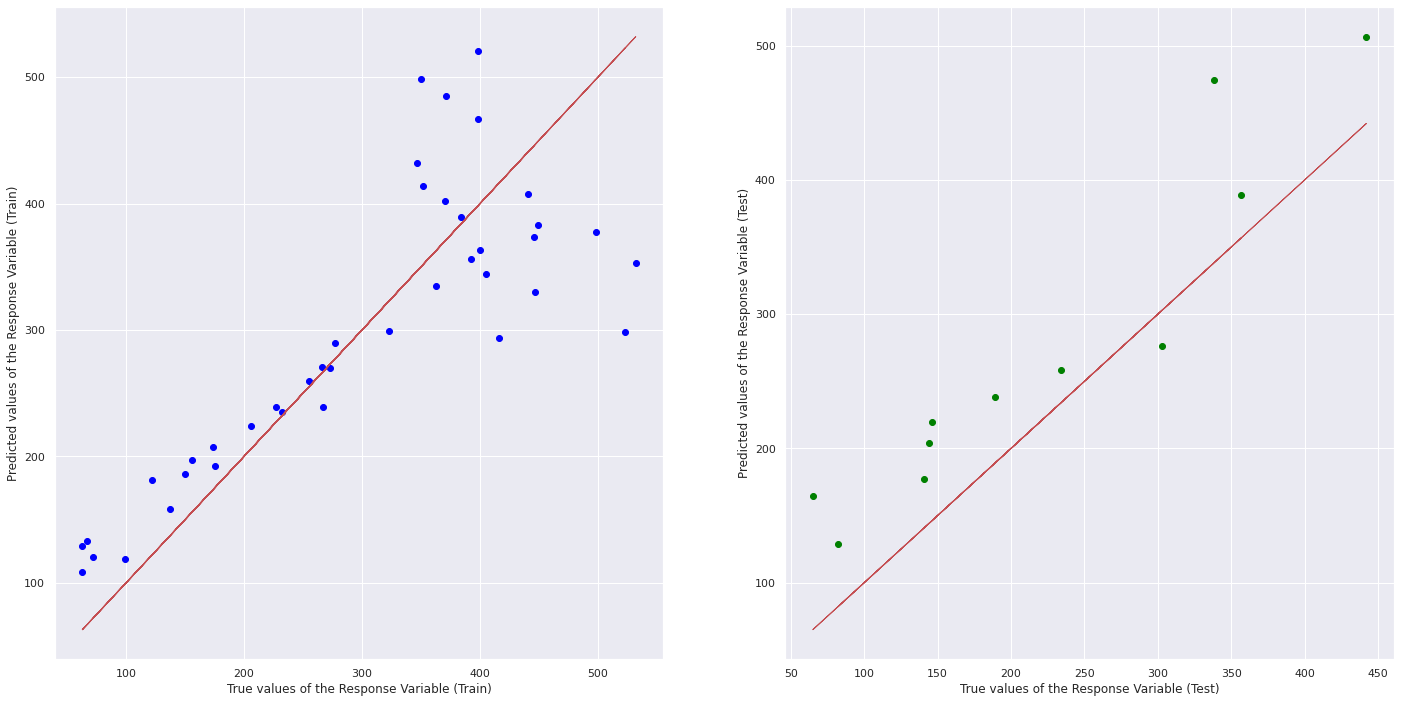

Goodness of Fit of Model 		Train Dataset
Explained Variance (R^2) 		: 0.6809136724472099
Mean Squared Error (MSE) 		: 5861.768200866161
Root Mean Squared Error (RMSE) 	: 76.5621851886828

Goodness of Fit of Model 		Test Dataset
Explained Variance (R^2) 		: 0.6690211053435802
Mean Squared Error (MSE) 		: 4529.744327914573
Root Mean Squared Error (RMSE) 	: 67.3033753084834



In [ ]:
predictors = ["CO2 Average", "temperature_anomaly"]

y = pd.DataFrame(total_LF["No. Of Disasters"])
x = pd.DataFrame(total_LF[predictors])

# split in to train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression() # create the linear regression object
linreg.fit(x_train, y_train) # train the linear regression model
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \t\tTrain Dataset")
print("Explained Variance (R^2) \t\t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t\t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \t\tTest Dataset")
print("Explained Variance (R^2) \t\t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t\t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Combining predicted values (CO2, Temperature Change) into a single dataframe:

In [ ]:
total_pred = pd.concat([co2Data_PredAvg, tempData_PredAvg], axis=1)
total_pred

,CO2 Average,temperature_anomaly
2021,415.783164,0.920804
2022,418.047540,0.941394
2023,420.311916,0.956269
2024,422.576292,0.975124
2025,424.840668,0.991229
2026,427.105044,1.009238
2027,429.369421,1.025930
2028,431.633797,1.043533
2029,433.898173,1.060506
2030,436.162549,1.077915


Using predicted values of (CO2, CH4, N2O and Temperature Change), we used the Multivariate Linear Regression model to predict the amount of Natural Disasters:

In [ ]:
x_pred = pd.DataFrame(total_pred[predictors])
y_pred = linreg.predict(x_pred)
y_pred

array([[504.61140919],
       [513.68079713],
       [521.61584505],
       [530.34092236],
       [538.52012521],
       [547.07727883],
       [555.37288689],
       [563.84951166],
       [572.20085843],
       [580.63890835]])

In [ ]:
total_pred = pd.concat([total_pred, pd.DataFrame(y_pred, columns = ["Predicted Amount of Natural Disasters"], index = total_pred.index)], axis=1)
total_pred

,CO2 Average,temperature_anomaly,Predicted Amount of Natural Disasters
2021,415.783164,0.920804,504.611409
2022,418.047540,0.941394,513.680797
2023,420.311916,0.956269,521.615845
2024,422.576292,0.975124,530.340922
2025,424.840668,0.991229,538.520125
2026,427.105044,1.009238,547.077279
2027,429.369421,1.025930,555.372887
2028,431.633797,1.043533,563.849512
2029,433.898173,1.060506,572.200858
2030,436.162549,1.077915,580.638908


Plotting the graph of actual Natural Disasters (1970 - 2020) with predicted Natural Disasters (2021 - 2030):

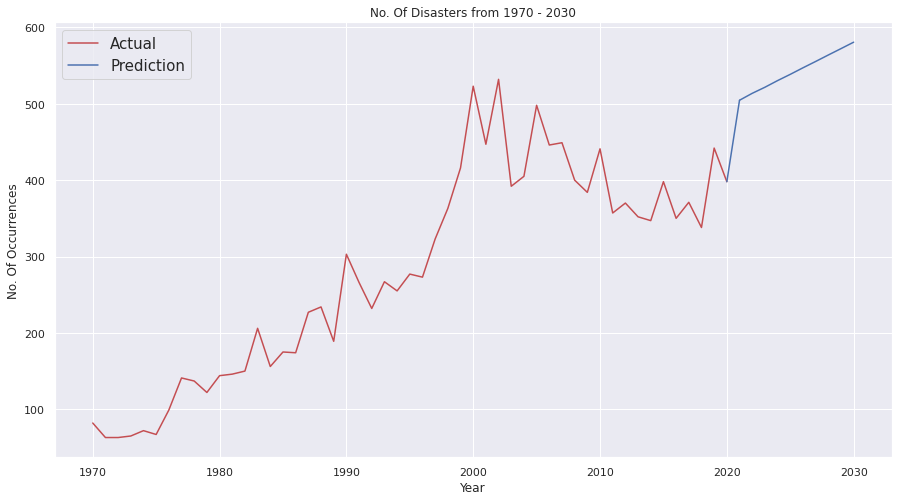

In [ ]:
plt.figure(figsize=(15,8))
plt.title("No. Of Disasters from 1970 - 2030")
plt.xlabel('Year')
plt.ylabel('No. Of Occurrences')
plt.plot(disasterCountPerYear['No. Of Disasters'], 'r')
# plt.plot(pd.concat([disasterCountPerYear['No. Of Disasters'], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters")], axis=0).to_frame(), 'r')
plt.plot(total_pred["Predicted Amount of Natural Disasters"], "b")
plt.plot(pd.concat([disasterCountPerYear['No. Of Disasters'].iloc[-1:], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters").iloc[:1]], axis=0), "b")

plt.legend(["Actual", "Prediction"], loc=2, prop={"size":15})
plt.show()

## Summary:
Model 2 is the favoured model.

**Model 1 (Predictors: CO2, CH4, N2O, Temperature Change):**
- Very poor and fluctuating R2 value when model was ran multiple times, due to low amount of data points 

**Model 2(Predictors: CO2, Temperature Change):**
- Stable R2 value even when model was ran multiple times, decent goodness of fit (RMSE)
  - Used data since 1970
